# Functional API

### Layer
- Layer instance는 tensor를 argument로 받아들인다.
- Layer instance의 output도 tensor이다.
- Layer instance들은 input/output tensor들을 통해 연결된 object들이다.
- Auxiliary 또는 multiple input/outputs을 access하는 것이 쉽다.

### Model
- 한 개 이상의 input tensor들과 output tensor들 사이의 function
- model 안에는 layer instance들이 input/output tensor들을 통해 연결
- computational graph(data flow from inputs to outputs)

### Example
- Conv2D layer with 32 filters, input tensor = x, output tensor = y
  $$ y = Conv2D_{32}{x} $$

## Functional API - MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
# Sequential 대신 Model
from tensorflow.keras.models import Model 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
num_labels = len(np.unique(y_train))
# one-hot incoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# reshape input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

In [11]:
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(y)

In [12]:
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

In [13]:
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0     

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
%time
history = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=10, batch_size=batch_size)

Wall time: 0 ns
Epoch 1/10
469/469 [==============================] - 53s 112ms/step - loss: 0.2655 - accuracy: 0.9165 - val_loss: 0.0633 - val_accuracy: 0.9793
Epoch 2/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 61s 130ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 4/10
469/469 [==============================] - 65s 138ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0265 - val_accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 78s 167ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0260 - val_accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 71s 152ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 7/10
469/469 [==============================] - 69s 146ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss:

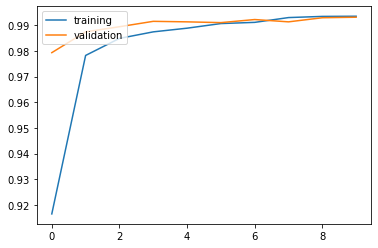

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [19]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

79/79 [==============================] - 2s 30ms/step - loss: 0.0208 - accuracy: 0.9931

Test accuracy: 99.3%
